##Classificação de Imagens de Documentos

1. Leitura de imagens de disco

```
Keras -> ImageDataGenerator (Data argumentation)
tensorflow -> Leitura de imagem por imagem
np.array  tensor

```



Keras-OCR/ PyTesseract/PyMuPDF
```
PyTesseract
-> extração de caracteres
-> 1 texto por duocumento
```

In [9]:
!pip install -U keras
!pip install tensorflow

You should consider upgrading via the 'C:\Users\Tong\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Tong\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Leitura de dados

In [10]:
path_documents = 'full_3'
lista_subfolders = os.listdir(path_documents)

dataset_dict = {}

dataset_dict['filename'] = []
dataset_dict['label'] = []

for folder in lista_subfolders:
    lista_imagens = os.listdir(path_documents+'/'+folder)

    for img_file in lista_imagens:
      dataset_dict['filename'].append(folder+'/'+img_file)
      dataset_dict['label'].append(folder)


In [11]:
df = pd.DataFrame(dataset_dict,columns=['filename','label'])
X = df['filename'].values
y = df['label'].values

In [12]:
lista_subfolders

['advertisement', 'email', 'scientific _publication']

In [13]:
df

,filename,label
0,advertisement/0000031285.tif,advertisement
1,advertisement/0000035285.tif,advertisement
2,advertisement/00001168.tif,advertisement
3,advertisement/00001172.tif,advertisement
4,advertisement/0000126074.tif,advertisement
...,...,...
2956,scientific _publication/9896.tif,scientific _publication
2957,scientific _publication/98970844_0846.tif,scientific _publication
2958,scientific _publication/99026124_6146.tif,scientific _publication
2959,scientific _publication/99038381_8383.tif,scientific _publication


Criação dos logits dos labels




```
Labels Nominais "Categoricos" -> Atributos Inteiros Ordinais -> to_categorial -> Logits
```



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.6, random_state=42)

In [15]:
from keras.utils.np_utils import to_categorical

train_labels = pd.Categorical(y_train)
valid_labels = pd.Categorical(y_valid)
test_labels = pd.Categorical(y_test)

y_train_int = train_labels.codes
y_valid_int = valid_labels.codes
y_test_int = test_labels.codes

y_train_logits = to_categorical(y_train_int)
y_valid_logits = to_categorical(y_valid_int)
y_test_logits = to_categorical(y_test_int)

lista_train = []
for i in range(0,len(X_train)):
    lista_train.append([X_train[i],y_train[i]])

lista_valid = []
for i in range(0,len(X_valid)):
    lista_valid.append([X_valid[i],y_valid[i]])

lista_test = []
for i in range(0,len(X_test)):
    lista_test.append([X_test[i],y_test[i]])

df_train = pd.DataFrame(lista_train,columns = ['filename','label'])
df_valid = pd.DataFrame(lista_valid,columns = ['filename','label'])
df_test = pd.DataFrame(lista_test,columns = ['filename','label'])

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   rotation_range=20,
                                    width_shift_range=0.2,  
                                    height_shift_range=0.2,   
                                    horizontal_flip=True)

agnostic_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(df_train,
                                              directory=path_documents,
                                              x_col='filename',y_col='label',
                                              class_mode='categorical',
                                              shuffle=True)

valid_generator = agnostic_datagen.flow_from_dataframe(df_valid,
                                              directory=path_documents,
                                              x_col='filename',y_col='label',
                                              class_mode='categorical',
                                              shuffle=True)

test_generator = agnostic_datagen.flow_from_dataframe(df_test,
                                              directory=path_documents,
                                              x_col='filename',y_col='label',
                                             class_mode='categorical',
                                             shuffle=True)

test_generator.image_shape

Found 2072 validated image filenames belonging to 3 classes.
Found 355 validated image filenames belonging to 3 classes.
Found 534 validated image filenames belonging to 3 classes.


(256, 256, 3)

Extrair os caracteres de cada documento

In [17]:
!pip install keras-ocr

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=fc44a03b6b2389b3e3e305a01389754ad478cf6b0b737b82133e790204914383
  Stored in directory: c:\users\tong\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Tong\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\Tong\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [20]:
import keras_ocr 
pipeline = keras_ocr.pipeline.Pipeline()

ModuleNotFoundError: No module named 'keras_ocr'

In [13]:
path_documents_img = '/content/drive/MyDrive/Colab Notebooks/Módulo 2/full_3/'

subfolder = path_documents_img  + 'advertisement'
dataAd = []

for img_file in os.listdir(subfolder):
      dataAd.append(subfolder +'/'+ img_file)

subfolder = path_documents_img + 'email'
dataE = []

for img_file in os.listdir(subfolder):
      dataE.append(subfolder +'/'+img_file)

subfolder = path_documents_img +  'scientific _publication'
dataS = []

for img_file in os.listdir(subfolder):
      dataS.append(subfolder +'/'+img_file)


In [14]:
dataset_ca = {}
dataset_ca['advertisements'] = []

In [15]:
advertisementsim = []

for path in dataAd:
  advertisementsim.append(keras_ocr.tools.read(path))

#prediction_groups = pipeline.recognize(advertisementsim)
#for predicted_image in prediction_groups:
  #for text, box in predicted_image:
    #dataset_ca['advertisements'].append(text)

In [16]:
#d = pd.DataFrame(dataset_ca,columns=['advertisements'])
#d

In [17]:
emailim = []

for path in dataE:
  emailim.append(keras_ocr.tools.read(path))

In [18]:
publicationsm = []

for path in dataS:
  publicationsm.append(keras_ocr.tools.read(path))

Hyperparameters

AlexNet (sem pré-treinamento)

In [19]:
dims = (224,224,3)
num_classes = 3

model = Sequential()
# Parte 1 da AlexNet
model.add(layers.experimental.preprocessing.Resizing(224,224,interpolation="bilinear",input_shape=(224,224,3)))
model.add(Conv2D(96,(11,11), strides=(4,4)))
model.add(Activation("relu"))
model.add(MaxPooling2D((3, 3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Parte 2 da AlexNet
model.add(Conv2D(256,(5,5), strides=(1,1),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D((3, 3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Parte 3 da AlexNet
model.add(Conv2D(384,(3,3), strides=(1,1),padding="same",activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(384,(3,3), strides=(1,1),padding="same",activation='relu'))

model.add(Conv2D(256,(3,3), strides=(1,1),padding="same",activation='relu'))

model.add(MaxPooling2D((3, 3),strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 activation_1 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 96)        0

In [21]:
sgd = SGD(lr=0.00001)

model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['accuracy'])

model.fit(train_generator,
          epochs=10,
          batch_size=16,
          validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
65/65 [==============================] - 56s 652ms/step - loss: 1.3673 - accuracy: 0.3253 - val_loss: 1.0955 - val_accuracy: 0.3315
Epoch 2/10
65/65 [==============================] - 37s 573ms/step - loss: 1.2700 - accuracy: 0.3480 - val_loss: 1.0925 - val_accuracy: 0.3343
Epoch 3/10
65/65 [==============================] - 36s 559ms/step - loss: 1.2345 - accuracy: 0.3682 - val_loss: 1.0899 - val_accuracy: 0.3511
Epoch 4/10
65/65 [==============================] - 35s 543ms/step - loss: 1.2282 - accuracy: 0.3837 - val_loss: 1.0844 - val_accuracy: 0.3708
Epoch 5/10
65/65 [==============================] - 37s 574ms/step - loss: 1.2250 - accuracy: 0.3716 - val_loss: 1.0746 - val_accuracy: 0.6124
Epoch 6/10
65/65 [==============================] - 36s 546ms/step - loss: 1.1834 - accuracy: 0.3991 - val_loss: 1.0583 - val_accuracy: 0.6629
Epoch 7/10
65/65 [==============================] - 37s 569ms/step - loss: 1.1598 - accuracy: 0.4088 - val_loss: 1.0338 - val_accuracy: 0.7022

```
-> Treinamento requer muitas iterações -> overfitting

+treinamento -validação -teste

```

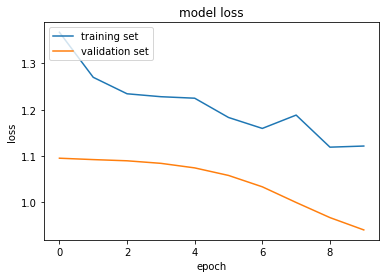

In [22]:
history_fine = model.history
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [23]:
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)

In [24]:
y_prob

array([[0.282929  , 0.36393124, 0.35313976],
       [0.26719147, 0.40098754, 0.331821  ],
       [0.27983525, 0.36504418, 0.35512057],
       ...,
       [0.3027646 , 0.3411793 , 0.35605606],
       [0.2584374 , 0.3992023 , 0.34236032],
       [0.27445745, 0.39351815, 0.33202443]], dtype=float32)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1,
       0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0,

In [26]:
y_test = test_generator.classes

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.24      0.27       190
           1       0.31      0.37      0.33       164
           2       0.28      0.31      0.30       179

    accuracy                           0.30       533
   macro avg       0.30      0.31      0.30       533
weighted avg       0.30      0.30      0.30       533



Transferência de Aprendizado

Grande quantidade de dados s/ risco de overfitting

ResNet50 

In [31]:
model_resnet_pt = Sequential()

pre_trained_model = ResNet50(input_shape=(224,224,3),
    include_top=False,
    pooling ='avg',
    weights="imagenet")

for layer in pre_trained_model.layers:
    layer.trainable = False

model_resnet_pt.add(pre_trained_model)
model_resnet_pt.add(Flatten())

model_resnet_pt.add(Dense(512))
model_resnet_pt.add(Activation("relu"))
model_resnet_pt.add(Dropout(0.5))

model_resnet_pt.add(Dense(num_classes))
model_resnet_pt.add(Activation("softmax"))

In [ ]:
sgd = SGD(learning_rate=0.00002)

model_resnet_pt.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['accuracy'])

history_fine =model_resnet_pt.fit(train_generator,
                        epochs=10,
                        batch_size=32,
                        validation_data=valid_generator)

Epoch 1/10
47/65 [====================>.........] - ETA: 9s - loss: 1.9956 - accuracy: 0.3258 

In [ ]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [ ]:
y_prob = model_resnet_pt.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))